<a href="https://colab.research.google.com/github/shridhar12d/Machine-Learning/blob/main/Kinematic_of_ARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forward Kinematics: x = 0.97, y = 1.67
Inverse Kinematics: theta1 = -19.33°, theta2 = 75.52°


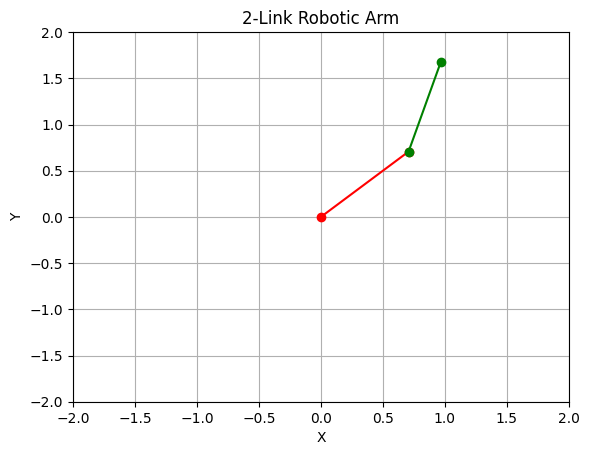

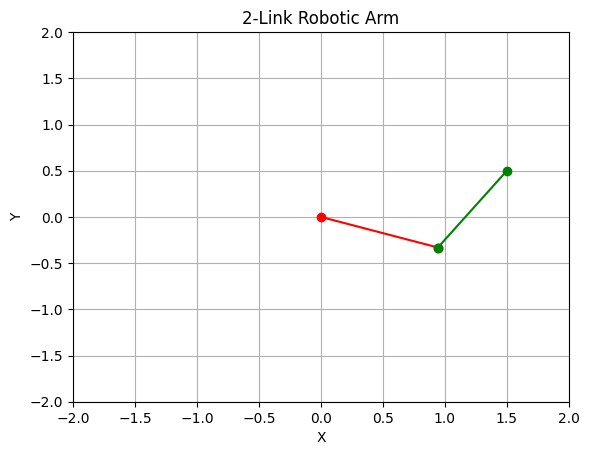

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lengths of the robot arm links
L1 = 1.0  # Length of the first link
L2 = 1.0  # Length of the second link

def forward_kinematics(theta1, theta2):

    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    return x, y

def inverse_kinematics(x, y):

    D = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2 = np.arctan2(np.sqrt(1 - D**2), D)
    theta1 = np.arctan2(y, x) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))
    return theta1, theta2


theta1, theta2 = np.radians(45), np.radians(30)
x, y = forward_kinematics(theta1, theta2)  # Compute end-effector position


print(f"Forward Kinematics: x = {x:.2f}, y = {y:.2f}")

desired_x, desired_y = 1.5, 0.5
theta1_inv, theta2_inv = inverse_kinematics(desired_x, desired_y)


print(f"Inverse Kinematics: theta1 = {np.degrees(theta1_inv):.2f}°, theta2 = {np.degrees(theta2_inv):.2f}°")

def plot_arm(theta1, theta2):

    x0, y0 = 0, 0
    x1, y1 = L1 * np.cos(theta1), L1 * np.sin(theta1)
    x2, y2 = forward_kinematics(theta1, theta2)  # End-effector

    plt.figure()
    plt.plot([x0, x1], [y0, y1], 'r-o')  # First link
    plt.plot([x1, x2], [y1, y2], 'g-o')  # Second link
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2-Link Robotic Arm')
    plt.grid()
    plt.show()


plot_arm(theta1, theta2)


plot_arm(theta1_inv, theta2_inv)
